# Pandas Practice on Bike Share Data

As a data scientist, you don't always have to invent the wheel from scratch. The great advantage of Python is that smart people before you spend a lot of energy on making life easier for the next programers. So please, make your life easier and use code that has already been implemented, don't call it "copying" but "friendly borrowing" of other people's code. If you copy whole functions or great graphs in the future, don't forget to give props to the inventor!

So for this exercise, too, if you get stuck at any point, look at good solutions from others and learn a lot from them about how to solve these problems even better.
Here are two good resources for small code snippet which can be very helpful when dealing with DataFrames:

- [Sebastian Raschkas "Things in Pandas I Wish I'd Known Earlier"](https://nbviewer.jupyter.org/github/rasbt/python_reference/blob/master/tutorials/things_in_pandas.ipynb)
- [Chris Albons set of code snippets](https://chrisalbon.com/)


**By the end of this session you should be able to**
- Explore data with Pandas to answer conceptual questions
- Write chained commands for effecient one-liners



In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/bike_share_201402_trip_data.csv')
df

Trip ID  Duration       Start Date                      Start Station  \
0          4576        63  8/29/2013 14:13           South Van Ness at Market   
1          4607        70  8/29/2013 14:42                 San Jose City Hall   
2          4130        71  8/29/2013 10:16            Mountain View City Hall   
3          4251        77  8/29/2013 11:29                 San Jose City Hall   
4          4299        83  8/29/2013 12:02           South Van Ness at Market   
...         ...       ...              ...                                ...   
144010   198771       385  2/28/2014 22:15                 Powell Street BART   
144011   198772       145  2/28/2014 22:38           Commercial at Montgomery   
144012   198773       677  2/28/2014 22:45             Embarcadero at Sansome   
144013   198774     64128  2/28/2014 23:01  Civic Center BART (7th at Market)   
144014   198775       570  2/28/2014 23:20                  2nd at South Park   

        Start Terminal         End Date                           End Station  \
0                   66  8/29/2013 14:14              South Van Ness at Market   
1                   10  8/29/2013 14:43                    San Jose City Hall   
2                   27  8/29/2013 10:17               Mountain View City Hall   
3                   10  8/29/2013 11:30                    San Jose City Hall   
4                   66  8/29/2013 12:04                        Market at 10th   
...                ...              ...                                   ...   
144010              39  2/28/2014 22:22              South Van Ness at Market   
144011              45  2/28/2014 22:40                      Davis at Jackson   
144012              60  2/28/2014 22:56                         Market at 4th   
144013              72   3/1/2014 16:50  Harry Bridges Plaza (Ferry Building)   
144014              64  2/28/2014 23:30                       Townsend at 7th   

        End Terminal  Bike # Subscription Type Zip Code  
0                 66     520        Subscriber    94127  
1                 10     661        Subscriber    95138  
2                 27      48        Subscriber    97214  
3                 10      26        Subscriber    95060  
4                 67     319        Subscriber    94103  
...              ...     ...               ...      ...  
144010            66     483        Subscriber    94404  
144011            42     425        Subscriber    94111  
144012            76     438        Subscriber    94102  
144013            50     414          Customer    94124  
144014            65     577        Subscriber    94107  

[144015 rows x 11 columns]

How many observations are there?

In [3]:
df.count()

Trip ID              144015
Duration             144015
Start Date           144015
Start Station        144015
Start Terminal       144015
End Date             144015
End Station          144015
End Terminal         144015
Bike #               144015
Subscription Type    144015
Zip Code             137885
dtype: int64

Change the columns to be Pythonic:

- lowercase 
- replace " " with `_` as a separator
- replace "#" with `num` 


In [3]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace("#", "num")
#df.str.lower()
df

trip_id  duration       start_date                      start_station  \
0          4576        63  8/29/2013 14:13           South Van Ness at Market   
1          4607        70  8/29/2013 14:42                 San Jose City Hall   
2          4130        71  8/29/2013 10:16            Mountain View City Hall   
3          4251        77  8/29/2013 11:29                 San Jose City Hall   
4          4299        83  8/29/2013 12:02           South Van Ness at Market   
...         ...       ...              ...                                ...   
144010   198771       385  2/28/2014 22:15                 Powell Street BART   
144011   198772       145  2/28/2014 22:38           Commercial at Montgomery   
144012   198773       677  2/28/2014 22:45             Embarcadero at Sansome   
144013   198774     64128  2/28/2014 23:01  Civic Center BART (7th at Market)   
144014   198775       570  2/28/2014 23:20                  2nd at South Park   

        start_terminal         end_date                           end_station  \
0                   66  8/29/2013 14:14              South Van Ness at Market   
1                   10  8/29/2013 14:43                    San Jose City Hall   
2                   27  8/29/2013 10:17               Mountain View City Hall   
3                   10  8/29/2013 11:30                    San Jose City Hall   
4                   66  8/29/2013 12:04                        Market at 10th   
...                ...              ...                                   ...   
144010              39  2/28/2014 22:22              South Van Ness at Market   
144011              45  2/28/2014 22:40                      Davis at Jackson   
144012              60  2/28/2014 22:56                         Market at 4th   
144013              72   3/1/2014 16:50  Harry Bridges Plaza (Ferry Building)   
144014              64  2/28/2014 23:30                       Townsend at 7th   

        end_terminal  bike_num subscription_type zip_code  
0                 66       520        Subscriber    94127  
1                 10       661        Subscriber    95138  
2                 27        48        Subscriber    97214  
3                 10        26        Subscriber    95060  
4                 67       319        Subscriber    94103  
...              ...       ...               ...      ...  
144010            66       483        Subscriber    94404  
144011            42       425        Subscriber    94111  
144012            76       438        Subscriber    94102  
144013            50       414          Customer    94124  
144014            65       577        Subscriber    94107  

[144015 rows x 11 columns]

In [34]:
df.columns

Index(['trip_id', 'duration', 'start_date', 'start_station', 'start_terminal',
       'end_date', 'end_station', 'end_terminal', 'bike_num',
       'subscription_type', 'zip_code'],
      dtype='object')

How many types of subscription options are there? What are the different subscription types?

In [35]:
df["subscription_type"].nunique()

2

What is the frequency of each subscription option?

In [36]:
df.groupby(["subscription_type"]).count()
#df[(df["subscription_type"] == "Customers").count()]   #df[(df["pH"] > 3.0) & (df["pH"] < 4.0)]

trip_id  duration  start_date  start_station  \
subscription_type                                                 
Customer             30368     30368       30368          30368   
Subscriber          113647    113647      113647         113647   

                   start_terminal  end_date  end_station  end_terminal  \
subscription_type                                                        
Customer                    30368     30368        30368         30368   
Subscriber                 113647    113647       113647        113647   

                   bike_num  zip_code  
subscription_type                      
Customer              30368     24238  
Subscriber           113647    113647

Please plot the frequency of each subscription option with a pie chart:

<AxesSubplot:ylabel='subscription_type'>

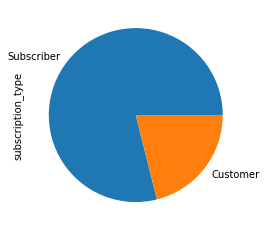

In [37]:
df["subscription_type"].value_counts().plot(kind="pie")

Please plot the frequency of each subscription option with a bar chart:

<AxesSubplot:>

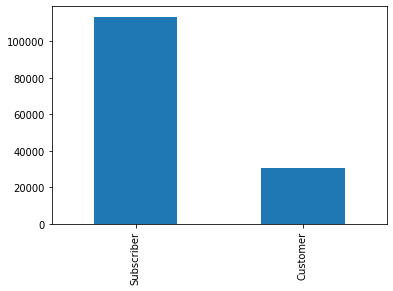

In [38]:
df["subscription_type"].value_counts().plot(kind="bar")

Have a look at the start_station column: Which 10 stations occur most frequently?

In [5]:
df["start_station"].value_counts().head(10)

San Francisco Caltrain (Townsend at 4th)         9838
Harry Bridges Plaza (Ferry Building)             7343
Embarcadero at Sansome                           6545
Market at Sansome                                5922
Temporary Transbay Terminal (Howard at Beale)    5113
Market at 4th                                    5030
2nd at Townsend                                  4987
San Francisco Caltrain 2 (330 Townsend)          4976
Steuart at Market                                4913
Townsend at 7th                                  4493
Name: start_station, dtype: int64

Now look at the end_station column: Which 10 stations occur the least often?

In [40]:
df["start_station"].value_counts().tail(10)

Park at Olive                       189
Castro Street and El Camino Real    132
Redwood City Medical Center         123
San Antonio Shopping Center         108
San Mateo County Center             101
Franklin at Maple                    99
Broadway at Main                     45
Redwood City Public Library          44
San Jose Government Center           23
Mezes Park                            3
Name: start_station, dtype: int64

Create a table that has start_station segmented by subscription_type.

Include the marginals.

<details><summary>
Click here for a hintâ€¦
</summary>
`pd.crosstab`
</details>

In [41]:
#df["start_station"]
pd.crosstab(df["subscription_type"],df["start_station"])

start_station      2nd at Folsom  2nd at South Park  2nd at Townsend  \
subscription_type                                                      
Customer                     427                535              882   
Subscriber                  3349               3923             4105   

start_station      5th at Howard  Adobe on Almaden  Arena Green / SAP Center  \
subscription_type                                                              
Customer                     606                75                        82   
Subscriber                  2029               260                       257   

start_station      Beale at Market  Broadway St at Battery St  \
subscription_type                                               
Customer                       457                         20   
Subscriber                    2600                        181   

start_station      Broadway at Main  California Ave Caltrain Station  ...  \
subscription_type                                                     ...   
Customer                         14                              161  ...   
Subscriber                       31                              136  ...   

start_station      Santa Clara at Almaden  South Van Ness at Market  \
subscription_type                                                     
Customer                               94                       515   
Subscriber                            761                      3006   

start_station      Spear at Folsom  St James Park  Steuart at Market  \
subscription_type                                                      
Customer                       416             56               1007   
Subscriber                    3007            310               3906   

start_station      Temporary Transbay Terminal (Howard at Beale)  \
subscription_type                                                  
Customer                                                     427   
Subscriber                                                  4686   

start_station      Townsend at 7th  University and Emerson  \
subscription_type                                            
Customer                       518                     328   
Subscriber                    3975                     106   

start_station      Washington at Kearney  \
subscription_type                          
Customer                             561   
Subscriber                           911   

start_station      Yerba Buena Center of the Arts (3rd @ Howard)  
subscription_type                                                 
Customer                                                     628  
Subscriber                                                  1859  

[2 rows x 69 columns]

Let's look at the duration... Which unit do you think is used here?

How long is the shortest trip? How many are that short?

In [42]:
df[df.duration == df.duration.min()]

trip_id  duration        start_date  \
2887       8576        60     9/2/2013 9:40   
2925       8651        60    9/2/2013 10:50   
3535       9444        60     9/3/2013 8:37   
7296      14644        60    9/8/2013 13:55   
10457     18792        60   9/12/2013 10:09   
11545     20271        60   9/13/2013 12:43   
13437     22689        60   9/15/2013 21:15   
20568     32159        60   9/23/2013 18:53   
40000     57581        60  10/14/2013 14:47   
55127     77650        60  10/30/2013 18:22   
72159    100171        60  11/18/2013 15:01   
79739    110247        60   11/28/2013 9:52   
88852    122928        60   12/12/2013 9:18   
92925    128828        60  12/17/2013 17:28   
98183    136099        60  12/26/2013 15:55   
115725   160479        60   1/21/2014 13:01   
124134   171822        60   1/30/2014 21:51   

                                        start_station  start_terminal  \
2887             Harry Bridges Plaza (Ferry Building)              50   
2925          San Francisco Caltrain 2 (330 Townsend)              69   
3535                      Redwood City Public Library              24   
7296         San Francisco Caltrain (Townsend at 4th)              70   
10457               Civic Center BART (7th at Market)              72   
11545                                   Market at 4th              76   
13437                          Embarcadero at Sansome              60   
20568                                 Townsend at 7th              65   
40000                                 Clay at Battery              41   
55127            Harry Bridges Plaza (Ferry Building)              50   
72159   Temporary Transbay Terminal (Howard at Beale)              55   
79739                                 2nd at Townsend              61   
88852                   Powell at Post (Union Square)              71   
92925                               Steuart at Market              74   
98183                               2nd at South Park              64   
115725                                2nd at Townsend              61   
124134                                2nd at Townsend              61   

                end_date                                    end_station  \
2887       9/2/2013 9:41           Harry Bridges Plaza (Ferry Building)   
2925      9/2/2013 10:51        San Francisco Caltrain 2 (330 Townsend)   
3535       9/3/2013 8:38                    Redwood City Public Library   
7296      9/8/2013 13:56       San Francisco Caltrain (Townsend at 4th)   
10457    9/12/2013 10:10              Civic Center BART (7th at Market)   
11545    9/13/2013 12:44                                  Market at 4th   
13437    9/15/2013 21:16                         Embarcadero at Sansome   
20568    9/23/2013 18:54                                Townsend at 7th   
40000   10/14/2013 14:48                                Clay at Battery   
55127   10/30/2013 18:23           Harry Bridges Plaza (Ferry Building)   
72159   11/18/2013 15:02  Temporary Transbay Terminal (Howard at Beale)   
79739    11/28/2013 9:53                                2nd at Townsend   
88852    12/12/2013 9:19                  Powell at Post (Union Square)   
92925   12/17/2013 17:29                              Steuart at Market   
98183   12/26/2013 15:56                              2nd at South Park   
115725   1/21/2014 13:02                                2nd at Townsend   
124134   1/30/2014 21:52                                2nd at Townsend   

        end_terminal  bike_num subscription_type zip_code  
2887              50       354        Subscriber    94102  
2925              69       544        Subscriber    94107  
3535              24       239        Subscriber    94105  
7296              70       521        Subscriber    95126  
10457             72       632        Subscriber    94103  
11545             76       500        Subscriber    94116  
13437             60       577        Subscriber    94111  
20568          

What do you think is going on with the short trips?

In [43]:
df[["start_station", "end_station"]][df.duration == df.duration.min()]

start_station  \
2887             Harry Bridges Plaza (Ferry Building)   
2925          San Francisco Caltrain 2 (330 Townsend)   
3535                      Redwood City Public Library   
7296         San Francisco Caltrain (Townsend at 4th)   
10457               Civic Center BART (7th at Market)   
11545                                   Market at 4th   
13437                          Embarcadero at Sansome   
20568                                 Townsend at 7th   
40000                                 Clay at Battery   
55127            Harry Bridges Plaza (Ferry Building)   
72159   Temporary Transbay Terminal (Howard at Beale)   
79739                                 2nd at Townsend   
88852                   Powell at Post (Union Square)   
92925                               Steuart at Market   
98183                               2nd at South Park   
115725                                2nd at Townsend   
124134                                2nd at Townsend   

                                          end_station  
2887             Harry Bridges Plaza (Ferry Building)  
2925          San Francisco Caltrain 2 (330 Townsend)  
3535                      Redwood City Public Library  
7296         San Francisco Caltrain (Townsend at 4th)  
10457               Civic Center BART (7th at Market)  
11545                                   Market at 4th  
13437                          Embarcadero at Sansome  
20568                                 Townsend at 7th  
40000                                 Clay at Battery  
55127            Harry Bridges Plaza (Ferry Building)  
72159   Temporary Transbay Terminal (Howard at Beale)  
79739                                 2nd at Townsend  
88852                   Powell at Post (Union Square)  
92925                               Steuart at Market  
98183                               2nd at South Park  
115725                                2nd at Townsend  
124134                                2nd at Townsend

What is the longest trip?

In [44]:
df.duration.max()

722236

How would you define a "long" trip? How many trips are "long" according to your definition?

In [45]:
df[df.duration == df.duration.max()]
#df[["start_station", "end_station"]][df.duration == df.duration.max()]

trip_id  duration        start_date           start_station  \
80510   111309    722236  11/30/2013 13:29  University and Emerson   

       start_terminal         end_date             end_station  end_terminal  \
80510              35  12/8/2013 22:06  University and Emerson            35   

       bike_num subscription_type zip_code  
80510       247          Customer    94301

Do the long durations seem reasonable? Why are they so long? What could it tell us about the users?

<AxesSubplot:>

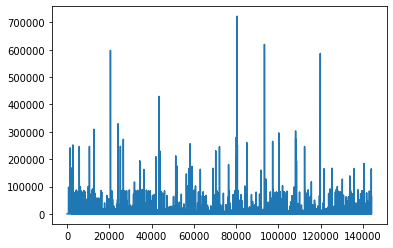

In [7]:
df.duration.plot()

Plot the duration column.

In [47]:
df["duration"].describe()

count    144015.000000
mean       1230.910141
std        6652.962329
min          60.000000
25%         349.000000
50%         531.000000
75%         797.000000
max      722236.000000
Name: duration, dtype: float64

Does this plot give any insights?

In [48]:
#No

Select subsections of the data to make plots that provide more insights.

<AxesSubplot:>

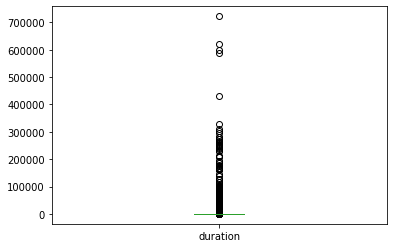

In [49]:
df["duration"].plot(kind="box")

The Product Team would like all of the station names to be lower case and  with `_` as a seperator

`South Van Ness at Market` -> `south_van_ness_at_market`  

**DO NOT USE A FOR LOOP. THEY ARE THE ðŸ‘¿**

In [54]:
df.start_station = df.start_station.str.lower()
df.start_station = df.start_station.replace(" ", "_")
df

trip_id  duration       start_date                      start_station  \
0          4576        63  8/29/2013 14:13           south van ness at market   
1          4607        70  8/29/2013 14:42                 san jose city hall   
2          4130        71  8/29/2013 10:16            mountain view city hall   
3          4251        77  8/29/2013 11:29                 san jose city hall   
4          4299        83  8/29/2013 12:02           south van ness at market   
...         ...       ...              ...                                ...   
144010   198771       385  2/28/2014 22:15                 powell street bart   
144011   198772       145  2/28/2014 22:38           commercial at montgomery   
144012   198773       677  2/28/2014 22:45             embarcadero at sansome   
144013   198774     64128  2/28/2014 23:01  civic center bart (7th at market)   
144014   198775       570  2/28/2014 23:20                  2nd at south park   

        start_terminal         end_date                           end_station  \
0                   66  8/29/2013 14:14              South Van Ness at Market   
1                   10  8/29/2013 14:43                    San Jose City Hall   
2                   27  8/29/2013 10:17               Mountain View City Hall   
3                   10  8/29/2013 11:30                    San Jose City Hall   
4                   66  8/29/2013 12:04                        Market at 10th   
...                ...              ...                                   ...   
144010              39  2/28/2014 22:22              South Van Ness at Market   
144011              45  2/28/2014 22:40                      Davis at Jackson   
144012              60  2/28/2014 22:56                         Market at 4th   
144013              72   3/1/2014 16:50  Harry Bridges Plaza (Ferry Building)   
144014              64  2/28/2014 23:30                       Townsend at 7th   

        end_terminal  bike_num subscription_type zip_code  
0                 66       520        Subscriber    94127  
1                 10       661        Subscriber    95138  
2                 27        48        Subscriber    97214  
3                 10        26        Subscriber    95060  
4                 67       319        Subscriber    94103  
...              ...       ...               ...      ...  
144010            66       483        Subscriber    94404  
144011            42       425        Subscriber    94111  
144012            76       438        Subscriber    94102  
144013            50       414          Customer    94124  
144014            65       577        Subscriber    94107  

[144015 rows x 11 columns]

Now take a timer and set it to 15 minutes. Take this time to explore the data guided by your own intuition or hypothesesâ€¦
> Timeboxing is a helpful approach when working with a new dataset so you won't fall into any rabbit holes. 